In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using LazyGrids,Interpolations,DataFrames,CSV,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

In [4]:
mat1 = material(1.5^2,1.0)
mat2 = material(epstable("silver"),1.0)
mat3 = material(1.0,1.0);


In [5]:
λ = collect(LinRange(600,1200,201))
k₀ = 2π ./ λ
d=30.0

k = mat1.k(minimum(k₀))
kpar = collect(LinRange(0,.99*k,401))

layer = layerstructure([mat1,mat2,mat3],[0.0,d],"up");

In [6]:
rtm = zeros(length(kpar),length(k₀))*im

for i in 1:length(k₀)
    rtC = rtcoeffs(layer,k₀[i],kpar,"up")
    r,t = rtC.r,rtC.t
    rtm[:,i] = r.TM
end

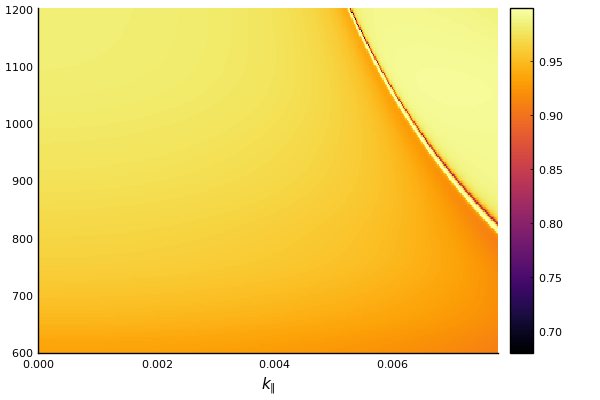

In [7]:
heatmap(kpar,λ,abs.(rtm)',xlabel=L"k_{∥}")